### Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
from math import exp, sqrt, cos, pi
from scipy.stats import norm


warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


### Define Function

In [2]:
f= lambda x:-20*exp(-0.2 * sqrt(0.5 * (x[0]**2 + x[1]**2))) - exp(0.5 * (cos(2 * pi * x[0]) + cos(2 * pi * x[1]))) + exp(1) + 20

### Generate Datapoints

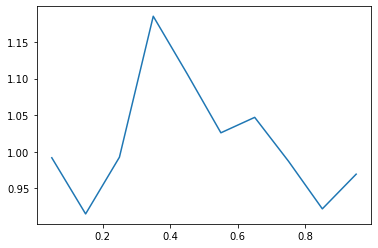

In [3]:
X=np.linspace(0.05,0.95,10)[:,None]
Y=f(X)+np.random.normal(0.,0.1,(10,1))
plt.plot(X, Y, label='Black Box')


### Define Kernel

In [4]:
k=GPy.kern.RBF(input_dim=1,variance=.1,lengthscale=0.1,name="rbf")
Xnew = np.linspace(-0.05, 1.05, 10)[:, None]


### Covariance & Mean

In [5]:
Kxx=k.K(X,X)+0.01*np.eye(10)
Ksx = k.K(Xnew, X)
Kss = k.K(Xnew, Xnew)

In [6]:
mean = Ksx @ np.linalg.inv(Kxx) @ Y
Cov = Kss - Ksx @ np.linalg.inv(Kxx) @ Ksx.T

### UCB

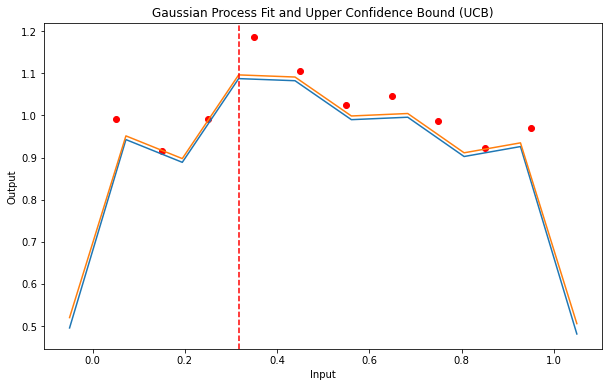

In [11]:
ucb_parameter = .10  # You can adjust this parameter based on your preference

# Calculate Upper Confidence Bound (UCB) values for each test point
ucb_values = mean.flatten() + ucb_parameter * np.sqrt(np.diag(Cov))

# Plot the GP fit, UCB values, and data points
plt.figure(figsize=(10, 6))
plt.plot(Xnew, mean, label='GP Mean')
plt.plot(Xnew, ucb_values, label='Upper Confidence Bound (UCB)')
plt.scatter(X, Y, c='red', label='Data')
plt.axvline(x=Xnew[np.argmax(ucb_values)], color='r', linestyle='--', label='Next Evaluation Point')

#plt.scatter(next_sample_point_ucb, ucb_values[next_sample_idx_ucb], c='green', marker='o', s=100, label='Next Sample Point (UCB)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Gaussian Process Fit and Upper Confidence Bound (UCB)')

plt.show()
